In [1]:
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt 

In [2]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(
   'C:/Users/Awoleye/Downloads/archive (33)/train',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    'C:/Users/Awoleye/Downloads/archive (33)/test',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])   

C:\Users\Awoleye\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
history = model.fit(
    train_data,
    steps_per_epoch=100,
    epochs=100,
    validation_data=test_data,
    validation_steps=25
)

Epoch 1/100


C:\Users\Awoleye\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 18/100 ━━━━━━━━━━━━━━━━━━━━ 1:13 892ms/step - accuracy: 0.5399 - loss: 0.7202

C:\Users\Awoleye\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 268ms/step - accuracy: 0.5020 - loss: 0.7265 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 174ms/step - accuracy: 0.5196 - loss: 0.6894 - val_accuracy: 0.5071 - val_loss: 0.6897
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 257ms/step - accuracy: 0.5414 - loss: 0.6855 - val_accuracy: 0.5857 - val_loss: 0.6868
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 54s 111ms/step - accuracy: 0.5454 - loss: 0.6737 - val_accuracy: 0.5214 - val_loss: 0.6859
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 119ms/step - accuracy: 0.6299 - loss: 0.6468 - val_accuracy: 0.5571 - val_loss: 0.7216
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.6336 - loss: 0.6371 - val_accuracy: 0.5357 - val_loss: 0.6985
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 109ms/step - accuracy: 0.6234 - loss: 0.6299 - val_accuracy: 0.6643 - val_loss: 0.6964
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - accuracy: 0.6910 - loss: 0.616

<function matplotlib.pyplot.show(close=None, block=None)>

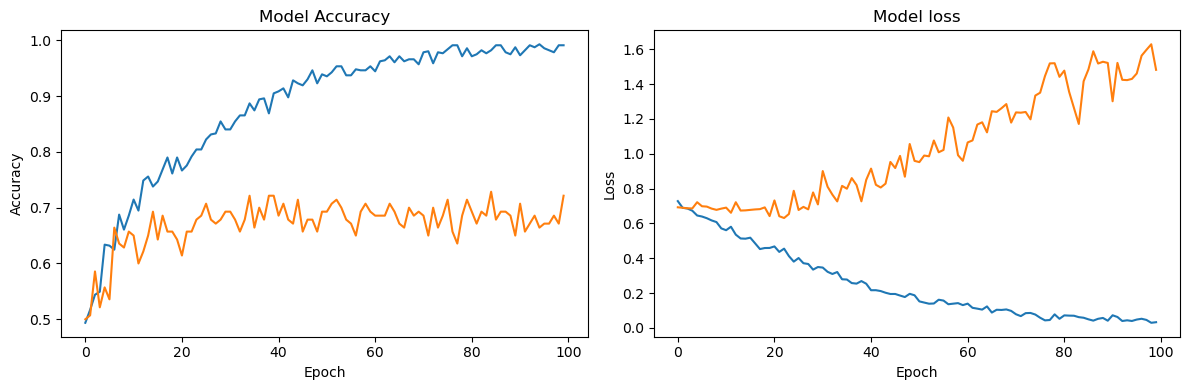

In [5]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show

In [ ]:
model.save('cnn.keras')